In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
iris= pd.read_csv("Downloads/dirty_iris.csv")


In [4]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor


In [5]:
matrix=iris.shape

In [6]:
no_of_observation = matrix[0] * matrix[1]

In [7]:
no_of_incomplete_observation= iris.isnull().sum().sum()

In [8]:
no_of_complete = no_of_observation- no_of_incomplete_observation
no_of_complete
per = no_of_complete/no_of_observation*100
per

92.26666666666667

In [9]:
dataX = iris.copy()
dataX.dropna(inplace = True)
dataX


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
7,5.9,3.0,5.1,1.8,virginica
...,...,...,...,...,...
143,6.3,2.9,5.6,1.8,virginica
144,5.7,2.5,5.0,2.0,virginica
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor


In [10]:
def species_check(iris) :
        species = set(["setosa","versicolor","virginica"])
        func = lambda r : r in species
        x = np.array([func(xi) for xi in iris["Species"]])
        if (False in x) :
            print("Violation : Invalid species name")
            print(str(len(x) - np.sum(x)) + " violations")
        else :
            print("No Violation")
        return (len(x) - np.sum(x))

In [11]:
species_check(iris)

No Violation


0

In [12]:
def check_petal(temp) :
        a = np.array(temp["Petal.Length"]>(2*temp["Petal.Width"]))
        if (False in a) :
            print("Violation : Petal Length is less than twice of Petal Width in some places")
            print(str(len(a) - np.sum(a)) + " violations")
        else :
            print("No Violation")
        return (len(a) - np.sum(a))
    
check_petal(dataX)

Violation : Petal Length is less than twice of Petal Width in some places
2 violations


2

In [13]:
def sepal_Check(temp) :
    a = np.array(temp["Sepal.Length"]<=30)
    if (False in a) :
        print("Violation : Sepal Length is greater than 30 cm in some places")
        print(str(len(a) - np.sum(a)) + " violations")
    else :
        print("No Violation")
    return (len(a) - np.sum(a))

sepal_Check(dataX)

Violation : Sepal Length is greater than 30 cm in some places
1 violations


1

In [14]:
def sepal_petal_check(temp) :
    a = np.array(temp["Sepal.Length"]>temp["Petal.Length"])
    if (False in a) :
        print("Violation : Sepal length is greater than petal length in some places")
        print(str(len(a) - np.sum(a)) + " violations\n")
    else :
        print("No Violation\n")
    return (len(a) - np.sum(a))

sepal_petal_check(dataX)

Violation : Sepal length is greater than petal length in some places
1 violations



1

In [16]:
def positive_Check(temp) :
    func = lambda r : r > 0
    a = np.array([func(temp[xi]) for xi in temp.columns[:-1]])
    a = a.reshape(a.shape[0]*a.shape[1])
    if (False in a) :
        print("Violation : Non-positive values present")
        print(str(len(a) - np.sum(a)) + " violations\n")
    else :
        print("No Violation\n")
    return (len(a) - np.sum(a))

positive_Check(dataX)

Violation : Non-positive values present
3 violations



3

In [17]:
rules = {"species_check" : species_check, 
         "positive_check" : positive_Check, 
         "check_petal" : check_petal, 
         "sepal_Check" : sepal_Check, 
         "sepal_petal_check" : sepal_petal_check
        }


In [18]:
x = []
for i in rules.keys() :
    x.append(rules[i](dataX))


No Violation
Violation : Non-positive values present
3 violations

Violation : Petal Length is less than twice of Petal Width in some places
2 violations
Violation : Sepal Length is greater than 30 cm in some places
1 violations
Violation : Sepal length is greater than petal length in some places
1 violations



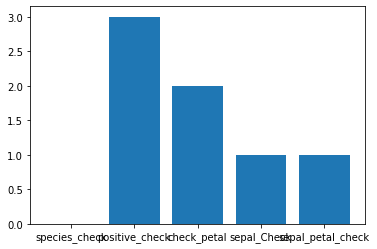

In [19]:
import matplotlib.pyplot as plt

dataX.loc[0,:]

plt.bar(rules.keys(),x)
plt.show()
